## Places365 Challenge 2016

- 365개의 클래스 중 10개의 클래스를 뽑아 사용
- 총 40만장의 이미지 **(train:32만, val:8만)**


![Image](https://www.tensorflow.org/images/AnimatedFileQueues.gif)

In [1]:
import csv
import numpy as np
from tensorflow.python.lib.io import tf_record

In [2]:
# read train & validation set from csv files.
val = []
with open('val.csv', 'rt') as csvfile:
    csvfile_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csvfile_reader:
        val.append(row)
valset = np.array(val)
valset.shape

(80000, 2)

In [3]:
train = []
with open('train.csv', 'rt') as csvfile:
    csvfile_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csvfile_reader:
        train.append(row)
trainset = np.array(train)
trainset.shape

(320000, 2)

In [4]:
ten_encode = {42:0,48:1,81:2,151:3,192:4,205:5,323:6,330:7,337:8,355:9}

In [5]:
selected_class = {0:'baseball_field',1:'beach',2:'canyon',3:'forest_path',4:'industrial_area',
                  5:'lake-natural',6:'swamp',7:'temple-asia',8:'train_station-platform',
                  9:'waterfall'}

In [6]:
for x in valset:
    x[1] = ten_encode[int(x[1])]
for x in trainset:
    x[1] = ten_encode[int(x[1])]

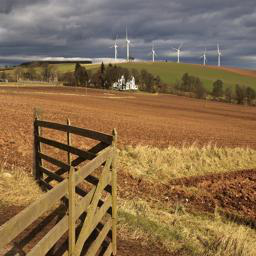

In [7]:
from PIL import Image
im = Image.open(trainset[0][0])
im

In [8]:
pix = np.array(im)
print(pix.shape, pix.dtype)

(256, 256, 3) uint8


In [9]:
def load_image(image_path):
    return np.array(Image.open(image_path))

In [10]:
import tensorflow as tf

def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))
def _float_feature(value):
  return tf.train.Feature(bytes_list=tf.train.FloatList(value=[value]))

In [11]:
val_filename = 'places365_challenge_256x256_val.tfrecords.gz'  # address to save the TFRecords file

import sys
# open the TFRecords file
options = tf_record.TFRecordOptions(compression_type=tf_record.TFRecordCompressionType.GZIP)
writer = tf.python_io.TFRecordWriter(val_filename, options=options)
for i in range(len(valset)):
    # print how many images are saved every 1000 images
    if not i % 1000:
        print('Val data: {}/{}'.format(i, len(valset)))
        sys.stdout.flush()
    # Load the image
    img = load_image(valset[i][0])
    label = int(valset[i][1])
    # Create a feature
    feature = {'val/label': _int64_feature(label),
               'val/image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Val data: 0/80000
Val data: 1000/80000
Val data: 2000/80000
Val data: 3000/80000
Val data: 4000/80000
Val data: 5000/80000
Val data: 6000/80000
Val data: 7000/80000
Val data: 8000/80000
Val data: 9000/80000
Val data: 10000/80000
Val data: 11000/80000
Val data: 12000/80000
Val data: 13000/80000
Val data: 14000/80000
Val data: 15000/80000
Val data: 16000/80000
Val data: 17000/80000
Val data: 18000/80000
Val data: 19000/80000
Val data: 20000/80000
Val data: 21000/80000
Val data: 22000/80000
Val data: 23000/80000
Val data: 24000/80000
Val data: 25000/80000
Val data: 26000/80000
Val data: 27000/80000
Val data: 28000/80000
Val data: 29000/80000
Val data: 30000/80000
Val data: 31000/80000
Val data: 32000/80000
Val data: 33000/80000
Val data: 34000/80000
Val data: 35000/80000
Val data: 36000/80000
Val data: 37000/80000
Val data: 38000/80000
Val data: 39000/80000
Val data: 40000/80000
Val data: 41000/80000
Val data: 42000/80000
Val data: 43000/80000
Val data: 44000/80000
Val data: 45000/80000
V

In [12]:
train_filename = 'places365_challenge_256x256_train.tfrecords.gz'  # address to save the TFRecords file

# open the TFRecords file
options = tf_record.TFRecordOptions(compression_type=tf_record.TFRecordCompressionType.GZIP)
writer = tf.python_io.TFRecordWriter(train_filename, options=options)
for i in range(len(trainset)):
#for i in range(len(train_addrs)):
    # print how many images are saved every 1000 images
    if not i % 1000:
        print('Train data: {}/{}'.format(i, len(trainset)))
        sys.stdout.flush()
    # Load the image
    img = load_image(trainset[i][0])
    label = int(trainset[i][1])
    # Create a feature
    feature = {'train/label': _int64_feature(label),
               'train/image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Train data: 0/320000
Train data: 1000/320000
Train data: 2000/320000
Train data: 3000/320000
Train data: 4000/320000
Train data: 5000/320000
Train data: 6000/320000
Train data: 7000/320000
Train data: 8000/320000
Train data: 9000/320000
Train data: 10000/320000
Train data: 11000/320000
Train data: 12000/320000
Train data: 13000/320000
Train data: 14000/320000
Train data: 15000/320000
Train data: 16000/320000
Train data: 17000/320000
Train data: 18000/320000
Train data: 19000/320000
Train data: 20000/320000
Train data: 21000/320000
Train data: 22000/320000
Train data: 23000/320000
Train data: 24000/320000
Train data: 25000/320000
Train data: 26000/320000
Train data: 27000/320000
Train data: 28000/320000
Train data: 29000/320000
Train data: 30000/320000
Train data: 31000/320000
Train data: 32000/320000
Train data: 33000/320000
Train data: 34000/320000
Train data: 35000/320000
Train data: 36000/320000
Train data: 37000/320000
Train data: 38000/320000
Train data: 39000/320000
Train data: 4